# QB
Here, we will analyze the QB position to identify any patterns in fantasy performance.

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# helper functions
from plotting import plot_mean_vorp_and_counts, plot_ranks_line, plot_ranks_boxplot

# display
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# global random_state
random_state = 9

In [2]:
# load data
df = pd.read_csv('../../data/final_data/master.csv')

# get QBs
qb = df[df['Pos'] == 'QB']

# view
print(f'The QB data has {qb.shape[0]} rows and {qb.shape[1]} columns:')
qb.head()

The QB data has 4148 rows and 62 columns:


,Player,Tm,Pos,Age,G,GS,Pass_Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_Y/A,Rush_TD,Rec_Tgt,Rec_Rec,Rec_Yds,Rec_Y/R,Rec_TD,Fmb,FmbLost,Tot_TD,DraftKings,FanDuel,Key,Year,num_games,games_played_pct,games_started_pct,ProBowl,AllPro,Exp,New_Team,Points_standard,Points_half-ppr,Points_ppr,Points_6,OvrRank_standard,OvrRank_half-ppr,OvrRank_ppr,OvrRank_6,PosRank_standard,PosRank_half-ppr,PosRank_ppr,PosRank_6,VORP_standard_10tm,VORP_half-ppr_10tm,VORP_ppr_10tm,VORP_6_10tm,VORP_standard_12tm,VORP_half-ppr_12tm,VORP_ppr_12tm,VORP_6_12tm,VORP_standard_10tm_3WR,VORP_half-ppr_10tm_3WR,VORP_ppr_10tm_3WR,VORP_6_10tm_3WR,VORP_standard_12tm_3WR,VORP_half-ppr_12tm_3WR,VORP_ppr_12tm_3WR,VORP_6_12tm_3WR
4,Pete Beathard,STL,QB,28,4,0,7,17,114,2,1,2,2,1.000000,0,0.0,0,0,0.0,0,1.0,0.55,0,11.3,10.8,BeatPe00,1970,16,0.2500,0.0,0,0,6,0,9.66,9.66,9.66,14.66,253.0,262.0,265.0,254.0,47.0,47.0,47.0,48.0,-108.54,-108.54,-108.54,-144.58,-101.58,-101.58,-101.58,-139.98,-108.54,-108.54,-108.54,-144.58,-101.58,-101.58,-101.58,-139.98
9,Randy Johnson,ATL,QB,26,4,2,40,72,443,2,8,7,21,3.000000,0,0.0,0,0,0.0,0,0.0,0.00,0,22.8,19.8,JohnRa00,1970,16,0.2500,0.5,0,0,4,0,11.82,11.82,11.82,23.82,242.0,252.0,259.0,226.0,46.0,46.0,46.0,46.0,-106.38,-106.38,-106.38,-135.42,-99.42,-99.42,-99.42,-130.82,-106.38,-106.38,-106.38,-135.42,-99.42,-99.42,-99.42,-130.82
21,James Harris,BUF,QB,23,7,0,24,50,338,3,4,3,-8,-2.666667,0,0.0,0,0,0.0,0,2.0,1.10,0,22.7,18.7,HarrJa01,1970,16,0.4375,0.0,0,0,1,0,14.52,14.52,14.52,24.52,233.0,240.0,252.0,224.0,45.0,45.0,45.0,45.0,-103.68,-103.68,-103.68,-134.72,-96.72,-96.72,-96.72,-130.12,-103.68,-103.68,-103.68,-134.72,-96.72,-96.72,-96.72,-130.12
30,Karl Sweetan,RAM,QB,28,6,0,6,13,81,1,0,0,0,0.000000,0,0.0,0,0,0.0,0,0.0,0.00,0,7.2,7.2,SweeKa00,1970,16,0.3750,0.0,0,0,6,0,7.24,7.24,7.24,9.24,265.0,268.0,273.0,268.0,48.0,48.0,48.0,49.0,-110.96,-110.96,-110.96,-150.00,-104.00,-104.00,-104.00,-145.40,-110.96,-110.96,-110.96,-150.00,-104.00,-104.00,-104.00,-145.40
32,Rick Norton,GNB,QB,27,1,0,3,5,64,1,0,0,0,0.000000,0,0.0,0,0,0.0,0,0.0,0.00,0,6.6,6.6,NortRi00,1970,16,0.0625,0.0,0,0,5,0,6.56,6.56,6.56,8.56,267.0,273.0,278.0,272.0,49.0,49.0,49.0,50.0,-111.64,-111.64,-111.64,-150.68,-104.68,-104.68,-104.68,-146.08,-111.64,-111.64,-111.64,-150.68,-104.68,-104.68,-104.68,-146.08


## Top Performers
Here, we'll restrict our analysis to only positive VORP players. These are the players you want on your team to place well in a fantasy football league.

In [3]:
# positive VORP QBs
qb_pos = qb[qb.VORP_ppr_10tm >= 0].sort_values(['Year', 'VORP_ppr_10tm'], ascending=[True, False])

In [4]:
# look at shapes of both ALL QBs and pos VORP QBs
qb.shape, qb_pos.shape

((4148, 62), (540, 62))

- The original dataset contained about 4k QB seasons. In most of these, the QB was not a viable fantasy option.
- The new subset only contains just under 540 rows. Every QB season in this subset was at least replacement-level (10th ranked).

### Age and Experience

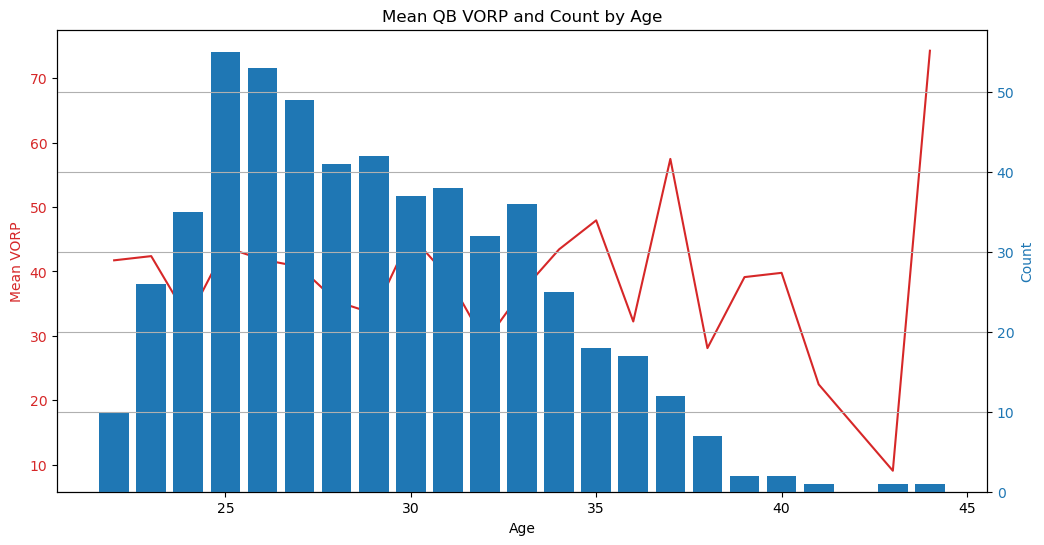

In [5]:
# plot QBs by age
plot_mean_vorp_and_counts(qb_pos, 'Age')

In [6]:
# describe 'Age' column
qb_pos['Age'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Age,540.0,29.051852,4.174876,22.0,26.0,29.0,32.0,44.0


In [7]:
# QBs at age 37
qb_pos[qb_pos.Age == 37][['Player', 'Year', 'Age', 'Exp', 'VORP_ppr_10tm', 'PosRank_ppr']]

,Player,Year,Age,Exp,VORP_ppr_10tm,PosRank_ppr
3948,Roger Staubach,1979,37,15,61.66,2.0
11186,Warren Moon,1993,37,9,15.28,4.0
13202,John Elway,1997,37,14,46.56,4.0
13748,Steve Young,1998,37,13,156.62,1.0
13756,Dan Marino,1998,37,15,0.00,10.0
14324,Doug Flutie,1999,37,5,27.00,6.0
15942,Rich Gannon,2002,37,14,57.60,1.0
19383,Kurt Warner,2008,37,10,45.50,5.0
22297,Peyton Manning,2013,37,14,151.06,1.0
22908,Tom Brady,2014,37,14,8.56,9.0


- The majority of QBs with top-10 fantasy seasons are between the ages of 25 and 33.
- There have been 12 banger seasons at age 37.

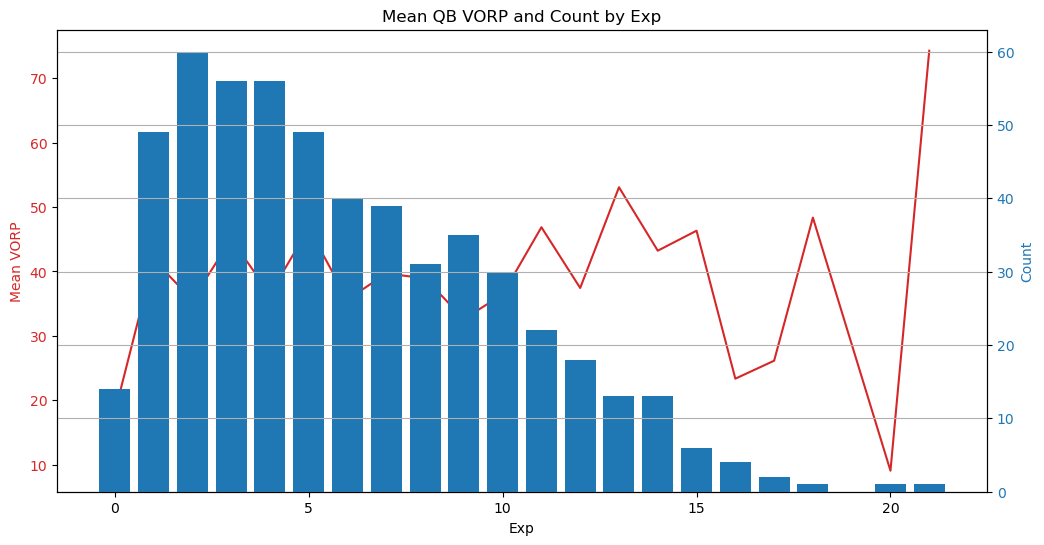

In [8]:
# plot QBs by exp
plot_mean_vorp_and_counts(qb_pos, 'Exp')

In [9]:
# describe 'Exp' column
qb_pos['Exp'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Exp,540.0,5.996296,4.036934,0.0,3.0,5.0,9.0,21.0


In [10]:
# QBs with 20+ years of experience
qb_pos[qb_pos.Exp >= 20][['Player', 'Year', 'Exp', 'VORP_ppr_10tm', 'PosRank_ppr']]

,Player,Year,Exp,VORP_ppr_10tm,PosRank_ppr
26525,Tom Brady,2020,20,9.08,8.0
27229,Tom Brady,2021,21,74.26,2.0


- Most elite fantasy QB seasons come from QBs in their 2nd-11th seasons.
- From season #2 to season #10, VORP is steady for the top performers.
- 12th-16th seasons show a spike (if a QB plays that long).
- Tom Brady causes the spike on the right side of the plot.

### Point Dispersion

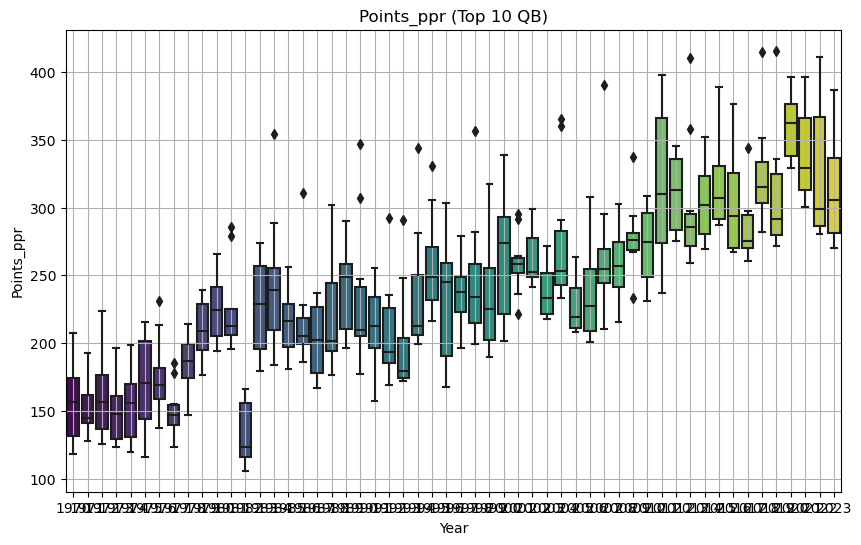

In [6]:
# boxplot of raw points
plot_ranks_boxplot(qb_pos, 'Points_ppr')

- The highest value of each boxplot is the maximum fantasy points for that season: the best QB. If shown as a dot (outlier), than these QBs were significantly better than those who were ranked below.
- The top edge of each box is the 75th percentile, corresponding to the mean fantasy points of the 3rd and 4th best QBs.
- The middle line in each box is the median, which is the mean of the 5th and 6th best QBs.
- The bottom edge of each box is the 25th percentile, corresponding to the mean of the 7th and 8th best QBs.
- The bottom value of each boxplot is 0, which is the value for replacement-level (10th ranked) QBs.

In [ ]:
# Dan Marino
qb_pos[(qb_pos.Player == 'Dan Marino') & (qb_pos.Year == 1984)][['Player', 'Year', 'Points_ppr', 'VORP_ppr_10tm']]

,Player,Year,Points_ppr,VORP_ppr_10tm
6359,Dan Marino,1984,354.06,170.5


Dan Marino was not only the first ever fantasy player to score 300 points in the 1984 season, but crushed this milestone with 354 points. 

In [ ]:
# Steve Young
qb_pos[(qb_pos.Player == 'Steve Young') & (qb_pos.Year == 1998)][['Player', 'Year', 'Points_ppr', 'VORP_ppr_10tm']]

,Player,Year,Points_ppr,VORP_ppr_10tm
13748,Steve Young,1998,356.2,156.62


This was not broken until 1998 by Steve Young.

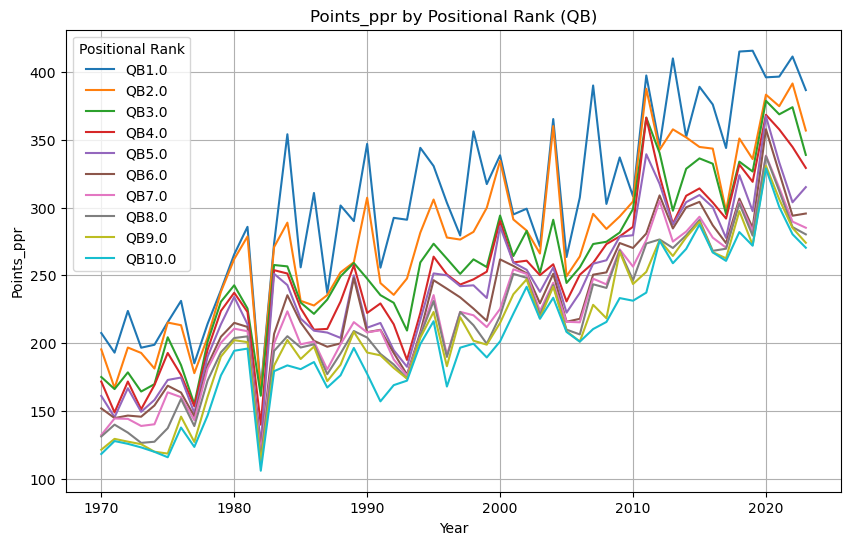

In [7]:
# plot lines of raw points
plot_ranks_line(qb_pos, 'Points_ppr')

- The fantasy points of all top-10 QBs has steadily increased over time as the league has become more pass heavy.
- In the 1970s, QB points were usually evenly dispersed.
- From 1980-2010, we saw many seasons where the top 1 or 2 QBs were clearly above the rest of the pack.
- This trend continued up to 2020, but in the 2010s we also saw a few seasons where 3 or 4 QBs were clearly above the rest.
- In the 3 seasons since 2020, the top 10 QBs have been generally evenly dispersed.

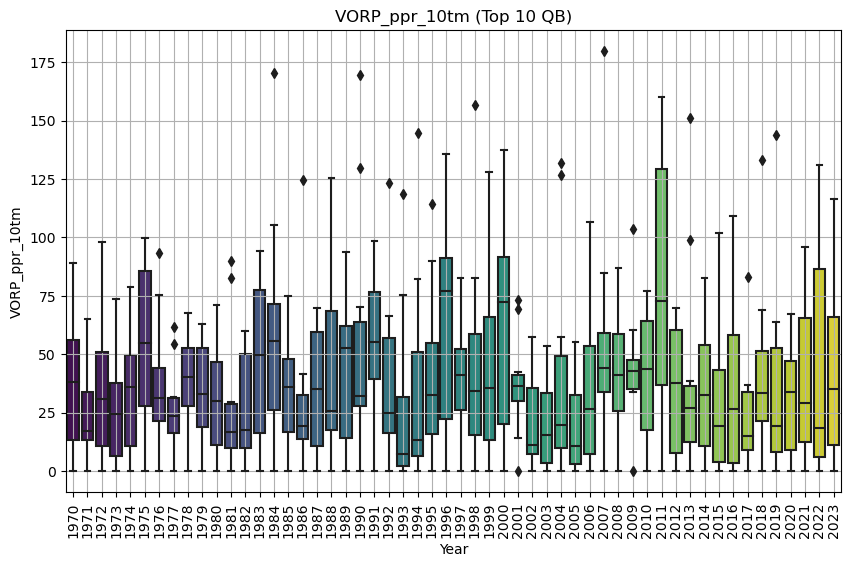

In [17]:
# boxplot of VORP
plot_ranks_boxplot(qb_pos, 'VORP_ppr_10tm')

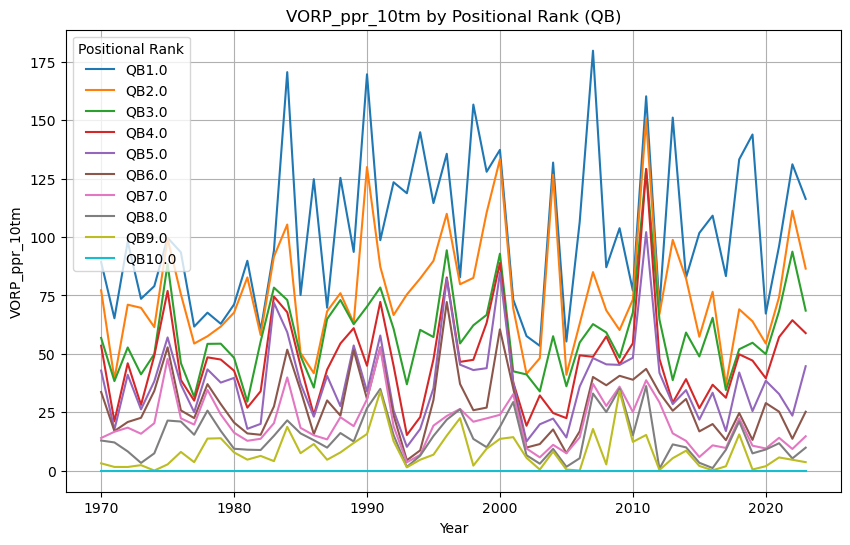

In [8]:
# plot lines of VORP
plot_ranks_line(qb_pos, 'VORP_ppr_10tm')

- Starting in 1984, the top 1 or 2 QBs have generally performed above the next 8 (most seasons).

In [9]:
# Tom Brady, 2007
qb_pos[(qb_pos.Player == 'Tom Brady') & (qb_pos.Year == 2007)][['Player', 'Year', 'Points_ppr', 'VORP_ppr_10tm']]

,Player,Year,Points_ppr,VORP_ppr_10tm
18823,Tom Brady,2007,390.04,179.66


In [10]:
# Lamar Jackson, 2019
qb_pos[(qb_pos.Player == 'Lamar Jackson') & (qb_pos.Year == 2019)][['Player', 'Year', 'Points_ppr', 'VORP_ppr_10tm']]

,Player,Year,Points_ppr,VORP_ppr_10tm
25900,Lamar Jackson,2019,415.68,143.82


Lamar scored 25 more points in his 2019 MVP season than Brady's 2007 MVP campaign. However, Brady was 179 points better than the replacement QB (versus Lamar's 143), making him a more valuable fantasy pick in that given season.

In [11]:
# get top 5 QBs by VORP for each season
qb_top5 = qb_pos.groupby('Year').apply(lambda x: x.nlargest(5, 'VORP_ppr_10tm')).reset_index(drop=True)

In [14]:
# get counts for each QB
qb_top5_count = qb_top5['Player'].value_counts()

# total amount of QBs who have finished top 5
len(set(qb_top5_count.index))

105

Since 1970, there have been 105 different players who have finished as a top 5 fantasy QB.

In [15]:
# look at value counts where count is >= 8
qb_top5_count[qb_top5_count >= 8]

Peyton Manning    12
Drew Brees         9
Aaron Rodgers      9
Tom Brady          8
Joe Montana        8
Roger Staubach     8
Dan Marino         8
Name: Player, dtype: int64

Since 1970, there have been 7 QBs who have finished as a top 5 fantasy QB 8+ times.

In [16]:
# get the all rows for players who appear in qb_top5 from the original qb dataframe
qb_top5_players = qb[qb.Player.isin(qb_top5_count.index)]

In [17]:
qb_top5_players.Player.nunique()

105

## Breakout
Inspect the data to identify any factors that may predict breakout (progressive) seasons.

In [29]:
# look at QB seasons with 30+ passing TDs
pass_td_30 = qb[qb.Pass_TD >= 30][['Player', 'Year', 'Pass_TD', 'VORP_ppr_10tm']]

# show counts for each player
print(f'There have been a total of {pass_td_30.Player.value_counts().sum()} NFL seasons with 30+ passing TDs with {pass_td_30.Player.nunique()} unique players. Here are the 11 QBs who have done it 4 or more times:')
pass_td_30.Player.value_counts()[pass_td_30.Player.value_counts() >= 4]

There have been a total of 142 NFL seasons with 30+ passing TDs with 54 unique players. Here are the 11 QBs who have done it 4 or more times:


Drew Brees            10
Tom Brady              9
Brett Favre            9
Peyton Manning         9
Aaron Rodgers          8
Philip Rivers          6
Russell Wilson         5
Dan Marino             4
Patrick Mahomes        4
Tony Romo              4
Ben Roethlisberger     4
Name: Player, dtype: int64

- Almost all of these guys are guaranteed Hall of Fame players.
- Rodgers, Mahomes and Wilson are the only players currently in the league who have completed this feat.
- Wilson is unlikely with a rough showing in Denver and an anemic Steelers offense.
- Mahomes has already established himself as an all-time great. He still has Kelce and Rashee Rice, who were great in 2023. In 2024, he gets to work with Hollywood Brown, who is a solid WR2 who showed flashes of WR1 upside in Arizona. He also gets the rookie Xavier Worthy, who recorded the fastest 40-yard dash of all time. His O-Line is projected 7th going into 2024, so I easily see 30+ passing touchdowns.
- Rodgers is interesting. The Jets offensive line is projected 5th in 2024, but he is coming off the achilles injury.

In [24]:
# look at QB seasons with 40+ passing TDs
pass_td_40 = qb[qb.Pass_TD >= 40][['Player', 'Year', 'Pass_TD', 'VORP_ppr_10tm']]

# show counts for each player
print(f'There have been a total of {pass_td_40.Player.value_counts().sum()} NFL seasons with 40+ passing TDs with {pass_td_40.Player.nunique()} unique players. Here are all of them:')
pass_td_40.Player.value_counts()

There have been a total of 19 NFL seasons with 40+ passing TDs with 10 unique players. Here are all of them:


Tom Brady           3
Aaron Rodgers       3
Dan Marino          2
Peyton Manning      2
Drew Brees          2
Matthew Stafford    2
Patrick Mahomes     2
Kurt Warner         1
Andrew Luck         1
Russell Wilson      1
Name: Player, dtype: int64

- Almost all of these guys are Hall of Fame caliber players. Luck likely would've been if he didn't retire so young, and I think Wilson still has a chance.
- Rodgers, Mahomes, and Wilson are once again the only players currently in the league who have completed this feat.

In [30]:
# look at QB seasons with 50+ passing TDs
pass_td_50 = qb[qb.Pass_TD >= 50][['Player', 'Year', 'Pass_TD', 'VORP_ppr_10tm']]

# show counts for each player
print(f'There have been a total of {pass_td_50.Player.value_counts().sum()} NFL seasons with 50+ passing TDs with {pass_td_50.Player.nunique()} unique players. Here are all of them:')
pass_td_50.Player.value_counts()

There have been a total of 3 NFL seasons with 50+ passing TDs with 3 unique players. Here are all of them:


Tom Brady          1
Peyton Manning     1
Patrick Mahomes    1
Name: Player, dtype: int64

- Once again, Mahomes has a ceiling like no other fantasy QB, especically in 6pt passing TD fantasy leagues.

## Bust
Inspect the data to identify any factors that may predict bust (regressive) seasons.